In [1]:
import os
import sys
import time
import copy
import re

import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from skimage import measure

In [2]:
label_dict = {1: 'wall', 2: 'floor', 3: 'plant', 4: 'ceiling', 5: 'furniture', 6: 'person', 7: 'door', 8: 'objects'}

# read in image
D1_IMG_PATH = os.path.join(os.getcwd(), '..', 'test_cases', 'test_obj_avoid_resize_d1.png')
SEG_IDX_PATH = os.path.join(os.getcwd(), '..', 'test_cases', 'test_obj_avoid_pred_idx.png')
d1_img = cv2.imread(D1_IMG_PATH, cv2.IMREAD_GRAYSCALE)
seg_idx = cv2.imread(SEG_IDX_PATH, cv2.IMREAD_GRAYSCALE)

In [10]:
visible_width = 90
depth_threshold = 8

In [11]:
_, w = seg_idx.shape
lower_limit = int(w/2 - visible_width/2)
upper_limit = int(w/2 + visible_width/2)
# masking by angle and distance
filter_seg_idx = (d1_img < depth_threshold) * seg_idx
filter_seg_idx[:, :lower_limit] = 0
filter_seg_idx[:, upper_limit:] = 0
# omit floor (idx = 1, name = 2) and ceiling (idx = 3, name = 4)
filter_seg_idx[filter_seg_idx == 1] = 0
filter_seg_idx[filter_seg_idx == 3] = 0

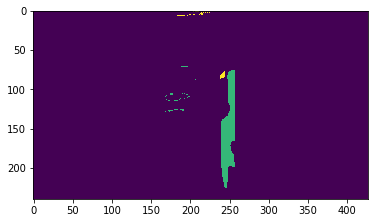

In [12]:
plt.imshow(filter_seg_idx)

In [6]:
np.unique(filter_seg_idx)

array([0, 4, 6], dtype=uint8)